
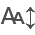

In [2]:
import pandas as pd
import panel as pn

from data_sources import ads_analytics, google_analytics, hubspot_conversions, sales
import fetch_api
from data_sources.ads_analytics import (
    get_facebook_ads_campaign_metrics,
    get_google_ads_campaign_metrics,
)
from data_sources.google_analytics import get_landing_page_report
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)


In [2]:
google_ads = get_google_ads_campaign_metrics()
facebook_ads = get_facebook_ads_campaign_metrics(since="2024-09-01", until="2025-04-27")

[2025-04-28 13:19:27 - INFO] Retrieving Google Ads campaign metrics
[2025-04-28 13:19:29 - INFO] Retrieved Google Ads campaign metrics in 1.56 seconds
[2025-04-28 13:19:29 - INFO] Retrieving Facebook Ads campaign metrics
[2025-04-28 13:20:08 - INFO] Retrieved Facebook Ads campaign metrics in 39.19 seconds


# Ads Analytics 2024-09-01 - 2025-04-27
## Facebook Ads Data (raw)

In [3]:
facebook_ads.loc["2024-09-01":]

campaign   spend  \
date                                                                    
2024-09-01  HM - TOF - Beginners - Angle Test - IL, DE & A...   27.46   
2024-09-01                     HM - TOF - ANGLE TESTING - ABO   11.07   
2024-09-01                     Retargeting | September 2023 |   27.15   
2024-09-02  HM - TOF - Beginners - Angle Test - IL, DE & A...   25.17   
2024-09-02                     HM - TOF - ANGLE TESTING - ABO   10.38   
...                                                       ...     ...   
2025-04-26                     HM - TOF - ANGLE TESTING - ABO   80.46   
2025-04-26  HM - TOF - Beginners - Angle Test - IL, DE & A...   17.79   
2025-04-27  HM - TOF - Beginners - Angle Test - IL, DE & A...   23.17   
2025-04-27                     HM - TOF - ANGLE TESTING - ABO  100.28   
2025-04-27                     Retargeting | September 2023 |   50.35   

            impressions  clicks  reach  
date                                    
2024-09-01         2632      34   2162  
2024-09-01         1061       8    931  
2024-09-01         3128      29   2263  
2024-09-02         2667      52   2113  
2024-09-02          928      11    774  
...                 ...     ...    ...  
2025-04-26         7390     118   6159  
2025-04-26         1604      19   1341  
2025-04-27         2087      17   1661  
2025-04-27         9158     148   7668  
2025-04-27         3771      53   2414  

[717 rows x 5 columns]

# Google Ads Data (raw)

In [4]:
google_ads.loc["2024-09-01":]  # .campaign.unique()

campaign  clicks  \
date                                                         
2024-09-01            HM | Pmax | OTHER | Homepage      29   
2024-09-01                    HM | Pmax | Homepage      65   
2024-09-01          HM | Search | BRAND | Homepage       2   
2024-09-02            HM | Pmax | OTHER | Homepage      17   
2024-09-02  HM | Search | BRAND | OTHER | Homepage       1   
...                                            ...     ...   
2025-04-27                         HM - DG - 04.25      28   
2025-04-27                    HM | Pmax | Homepage     145   
2025-04-28          HM | Search | BRAND | Homepage       2   
2025-04-28                    HM | Pmax | Homepage      41   
2025-04-28                         HM - DG - 04.25       9   

            top_impression_percentage  video_views  view_through_conversions  \
date                                                                           
2024-09-01                        NaN            0                         0   
2024-09-01                        NaN            4                         0   
2024-09-01                        1.0            0                         0   
2024-09-02                        NaN            0                         0   
2024-09-02                        1.0            0                         0   
...                               ...          ...                       ...   
2025-04-27                        NaN          281                         0   
2025-04-27                        NaN         1130                         0   
2025-04-28                        1.0            0                         0   
2025-04-28                        NaN          365                         0   
2025-04-28                        NaN          134                         0   

            conversions  cost_micros       ctr  engagements  \
date                                                          
2024-09-01     0.000000     10611236  0.037908            1   
2024-09-01     2.000000     36609296  0.017663           10   
2024-09-01     0.000000       360000  0.500000            0   
2024-09-02     2.000000     10139873  0.028333            0   
2024-09-02     0.000000        10000  1.000000            0   
...                 ...          ...       ...          ...   
2025-04-27     0.990094     13273417  0.010985          528   
2025-04-27     3.000000     64237810  0.011347         2528   
2025-04-28     0.000000       690000  0.333333            0   
2025-04-28     0.000000     22019508  0.008692          791   
2025-04-28     0.000000      5600737  0.009626          247   

            absolute_top_impression_percentage  ...  video_quartile_p100_rate  \
date                                            ...                             
2024-09-01                                 NaN  ...                       NaN   
2024-09-01                                 NaN  ...                       NaN   
2024-09-01                                 1.0  ...                       NaN   
2024-09-02                                 NaN  ...                       NaN   
2024-09-02                                 1.0  ...                       NaN   
...                                        ...  ...                       ...   
2025-04-27                                 NaN  ...                  0.070064   
2025-04-27                                 NaN  ...                       NaN   
2025-04-28                                 1.0  ...                       NaN   
2025-04-28                                 NaN  ...                       NaN   
2025-04-28                                 NaN  ...                  0.103226   

            video_quartile_p25_rate  video_quartile_p50_rate  \
date                                                           
2024-09-01                      NaN                      NaN   
2024-09-01                      NaN                      NaN   
2024-09-01                      NaN                      NaN   


# Merge Facebook and Google Ads Data (raw)

In [5]:
facebook_ads["platform"] = "Facebook"
google_ads["platform"] = "Google"
ads_data = (
    pd.concat([facebook_ads, google_ads])[
        ["spend", "clicks", "impressions", "campaign", "platform"]
    ]
    .loc["2024-09-01":]
    .sort_index()
    .reset_index()
    .set_index(["date", "platform", "campaign"])
)
ads_data["cpc"] = ads_data["spend"] / ads_data["clicks"]
ads_data


spend  \
date       platform campaign                                                        
2024-09-01 Facebook HM - TOF - Beginners - Angle Test - IL, DE & AT...  27.460000   
           Google   HM | Search | BRAND | Homepage                       0.360000   
                    HM | Pmax | Homepage                                36.609296   
                    HM | Pmax | OTHER | Homepage                        10.611236   
           Facebook Retargeting | September 2023 |                      27.150000   
...                                                                           ...   
2025-04-27 Facebook HM - TOF - Beginners - Angle Test - IL, DE & AT...  23.170000   
                    Retargeting | September 2023 |                      50.350000   
2025-04-28 Google   HM | Pmax | Homepage                                22.019508   
                    HM | Search | BRAND | Homepage                       0.690000   
                    HM - DG - 04.25                                      5.600737   

                                                                        clicks  \
date       platform campaign                                                     
2024-09-01 Facebook HM - TOF - Beginners - Angle Test - IL, DE & AT...      34   
           Google   HM | Search | BRAND | Homepage                           2   
                    HM | Pmax | Homepage                                    65   
                    HM | Pmax | OTHER | Homepage                            29   
           Facebook Retargeting | September 2023 |                          29   
...                                                                        ...   
2025-04-27 Facebook HM - TOF - Beginners - Angle Test - IL, DE & AT...      17   
                    Retargeting | September 2023 |                          53   
2025-04-28 Google   HM | Pmax | Homepage                                    41   
                    HM | Search | BRAND | Homepage                           2   
                    HM - DG - 04.25                                          9   

                                                                        impressions  \
date       platform campaign                                                          
2024-09-01 Facebook HM - TOF - Beginners - Angle Test - IL, DE & AT...         2632   
           Google   HM | Search | BRAND | Homepage                                4   
                    HM | Pmax | Homepage                                       3680   
                    HM | Pmax | OTHER | Homepage                                765   
           Facebook Retargeting | September 2023 |                             3128   
...                                                                             ...   
2025-04-27 Facebook HM - TOF - Beginners - Angle Test - IL, DE & AT...         2087   
                    Retargeting | September 2023 |                             3771   
2025-04-28 Google   HM | Pmax | Homepage                                       4717   
                    HM | Search | BRAND | Homepage                                6   
                    HM - DG - 04.25                                             935   

                                                                             cpc  
date       platform campaign                                                      
2024-09-01 Facebook HM - TOF - Beginners - Angle Test - IL, DE & AT...  0.807647  
           Google   HM | Search | BRAND | Homepage                      0.180000  
                    HM | Pmax | Homepage                                0.563220  
                    HM | Pmax | OTHER | Homepage                        0.365905  
           Facebook Retargeting | September 2023 |                      0.936207  
...                                                                          ...  
2025-04-27 Facebook HM - TOF - Beginners - Angle Test - IL, DE & AT...  1.362941  
                    Reta

In [6]:
# print(ads_data.head(10).to_markdown())

In [7]:
ads_data.index

MultiIndex([('2024-09-01', 'Facebook', ...),
            ('2024-09-01',   'Google', ...),
            ('2024-09-01',   'Google', ...),
            ('2024-09-01',   'Google', ...),
            ('2024-09-01', 'Facebook', ...),
            ('2024-09-01', 'Facebook', ...),
            ('2024-09-02', 'Facebook', ...),
            ('2024-09-02', 'Facebook', ...),
            ('2024-09-02',   'Google', ...),
            ('2024-09-02',   'Google', ...),
            ...
            ('2025-04-26',   'Google', ...),
            ('2025-04-27',   'Google', ...),
            ('2025-04-27',   'Google', ...),
            ('2025-04-27',   'Google', ...),
            ('2025-04-27', 'Facebook', ...),
            ('2025-04-27', 'Facebook', ...),
            ('2025-04-27', 'Facebook', ...),
            ('2025-04-28',   'Google', ...),
            ('2025-04-28',   'Google', ...),
            ('2025-04-28',   'Google', ...)],
           names=['date', 'platform', 'campaign'], length=1312)

In [8]:
# ads_data.columns

Generating Visualization 1: Spend and Clicks by Platform...


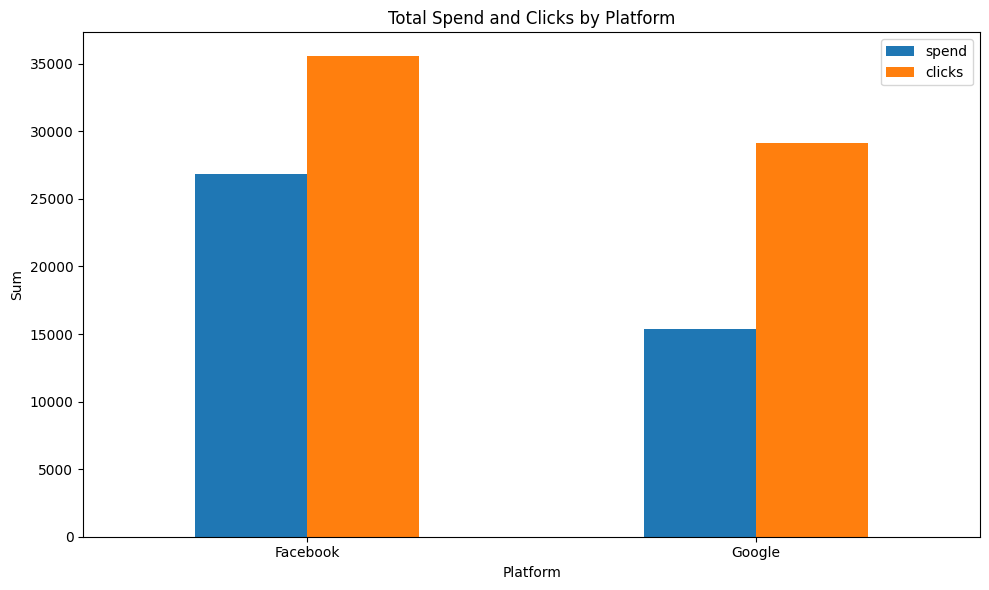


Generating Visualization 2: Spend and Clicks by Platform and Campaign...


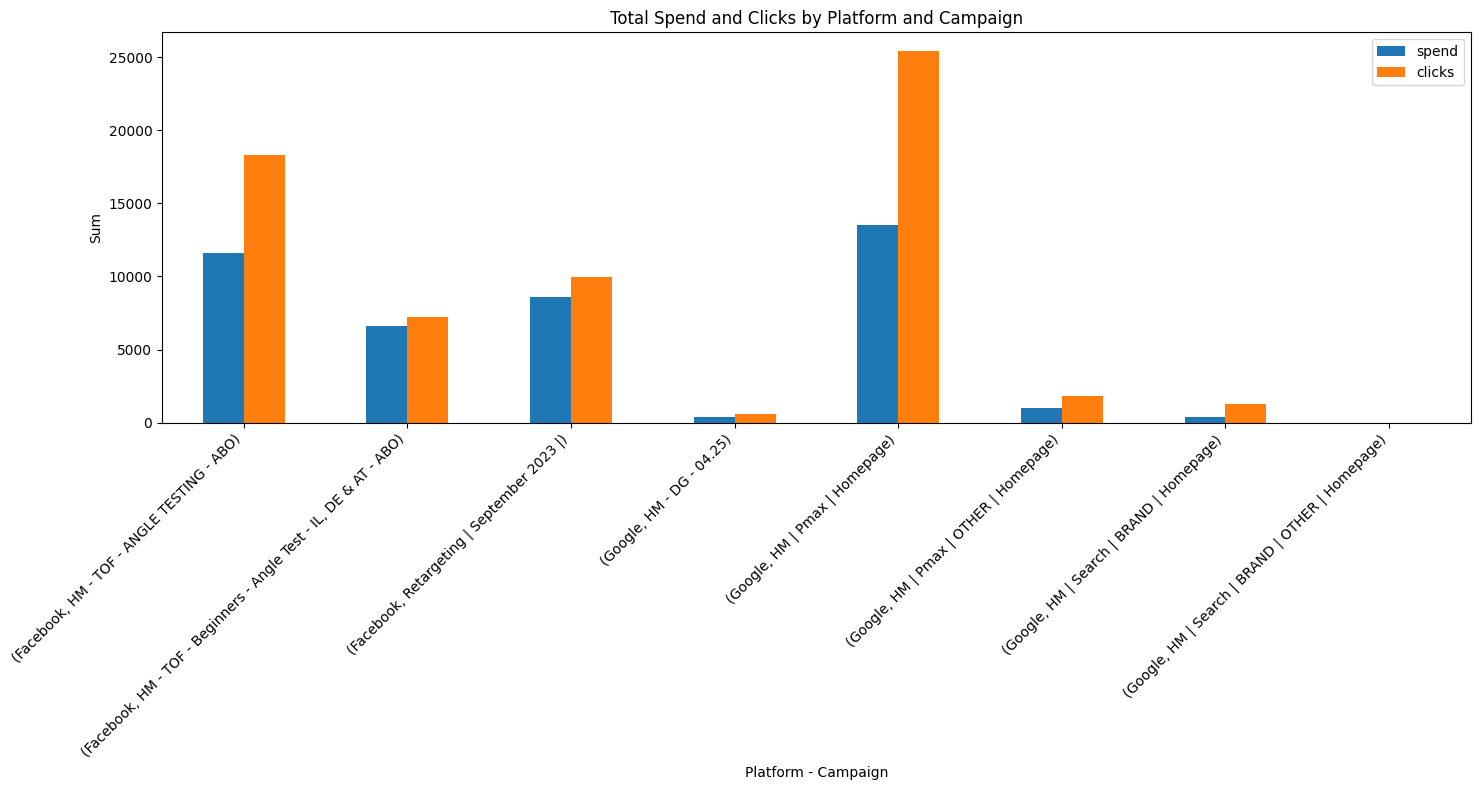

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'ads_data' is your DataFrame with MultiIndex ('date', 'platform', 'campaign')
# and columns 'spend', 'clicks', 'impressions', 'cpc'

# --- Preparation ---
# Reset index to use 'platform' and 'campaign' as columns for grouping
if isinstance(ads_data.index, pd.MultiIndex):
    ads_data_reset = ads_data.reset_index()
else:
    # If it's already reset or has a different index structure, adjust accordingly
    # This assumes 'platform' and 'campaign' are already columns if not in index
    ads_data_reset = ads_data.copy()

# Ensure necessary columns exist
required_cols = ["platform", "campaign", "spend", "clicks"]
if not all(col in ads_data_reset.columns for col in required_cols):
    raise ValueError(f"DataFrame must contain columns: {required_cols}")

# --- Visualization 1: Grouped by Platform ---
print("Generating Visualization 1: Spend and Clicks by Platform...")

# Group by platform and sum the metrics
platform_grouped = ads_data_reset.groupby("platform")[["spend", "clicks"]].sum()

# Create the grouped bar chart
ax1 = platform_grouped.plot(kind="bar", figsize=(10, 6), rot=0)
ax1.set_title("Total Spend and Clicks by Platform")
ax1.set_ylabel("Sum")
ax1.set_xlabel("Platform")
plt.tight_layout()
plt.show()

print("\nGenerating Visualization 2: Spend and Clicks by Platform and Campaign...")

# --- Visualization 2: Grouped by Platform and Campaign ---

# Group by platform and campaign, then sum the metrics
platform_campaign_grouped = ads_data_reset.groupby(["platform", "campaign"])[
    ["spend", "clicks"]
].sum()

# Create the grouped bar chart
# Note: This can become crowded if there are many campaigns.
ax2 = platform_campaign_grouped.plot(kind="bar", figsize=(15, 8), rot=45)
ax2.set_title("Total Spend and Clicks by Platform and Campaign")
ax2.set_ylabel("Sum")
ax2.set_xlabel("Platform - Campaign")

# Improve x-axis label readability
plt.xticks(ha="right")
plt.tight_layout()
plt.show()

# --- Alternative Visualization 2 using Seaborn (might be clearer for many campaigns) ---
# This creates separate plots for spend and clicks but uses hue for campaign grouping

# Melt the dataframe for easier plotting with Seaborn's hue
platform_campaign_melted = platform_campaign_grouped.reset_index().melt(
    id_vars=["platform", "campaign"],
    value_vars=["spend", "clicks"],
    var_name="metric",
    value_name="value",
)


Generating Visualization 3: Weekly Impressions, Clicks, CPC by Platform...


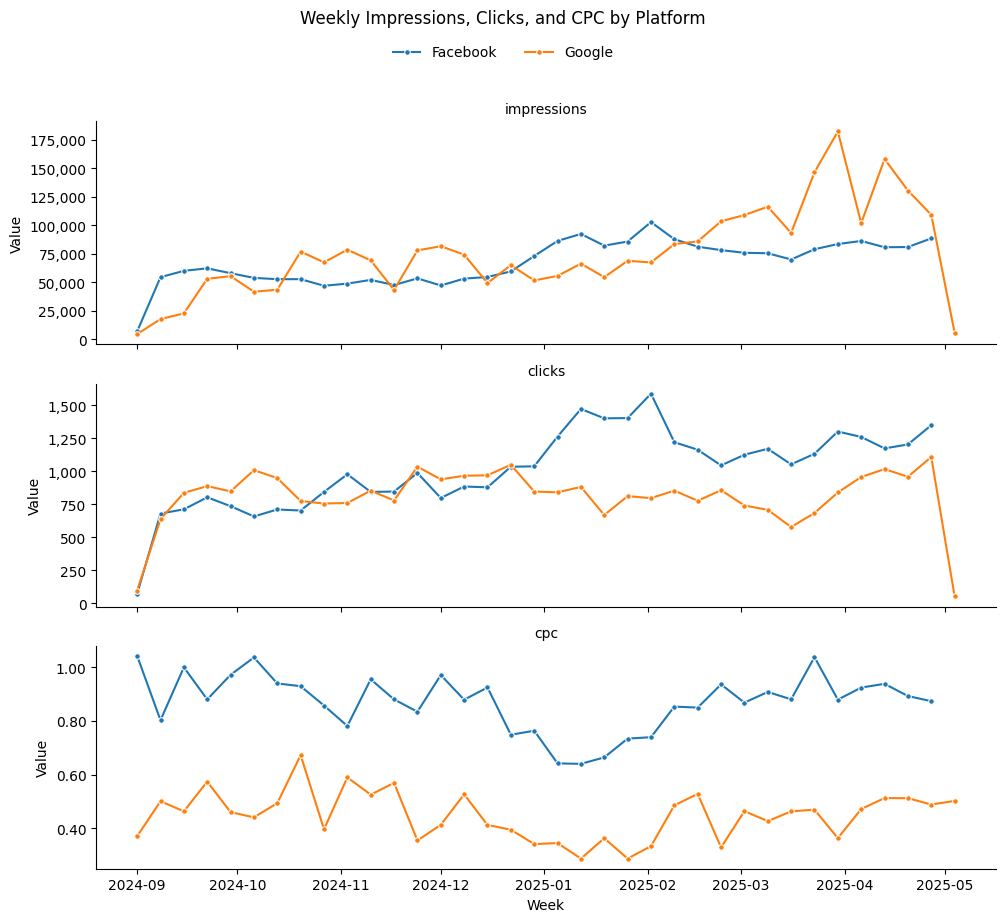


Generating Visualization 4: Weekly Metrics for Specific Campaigns...


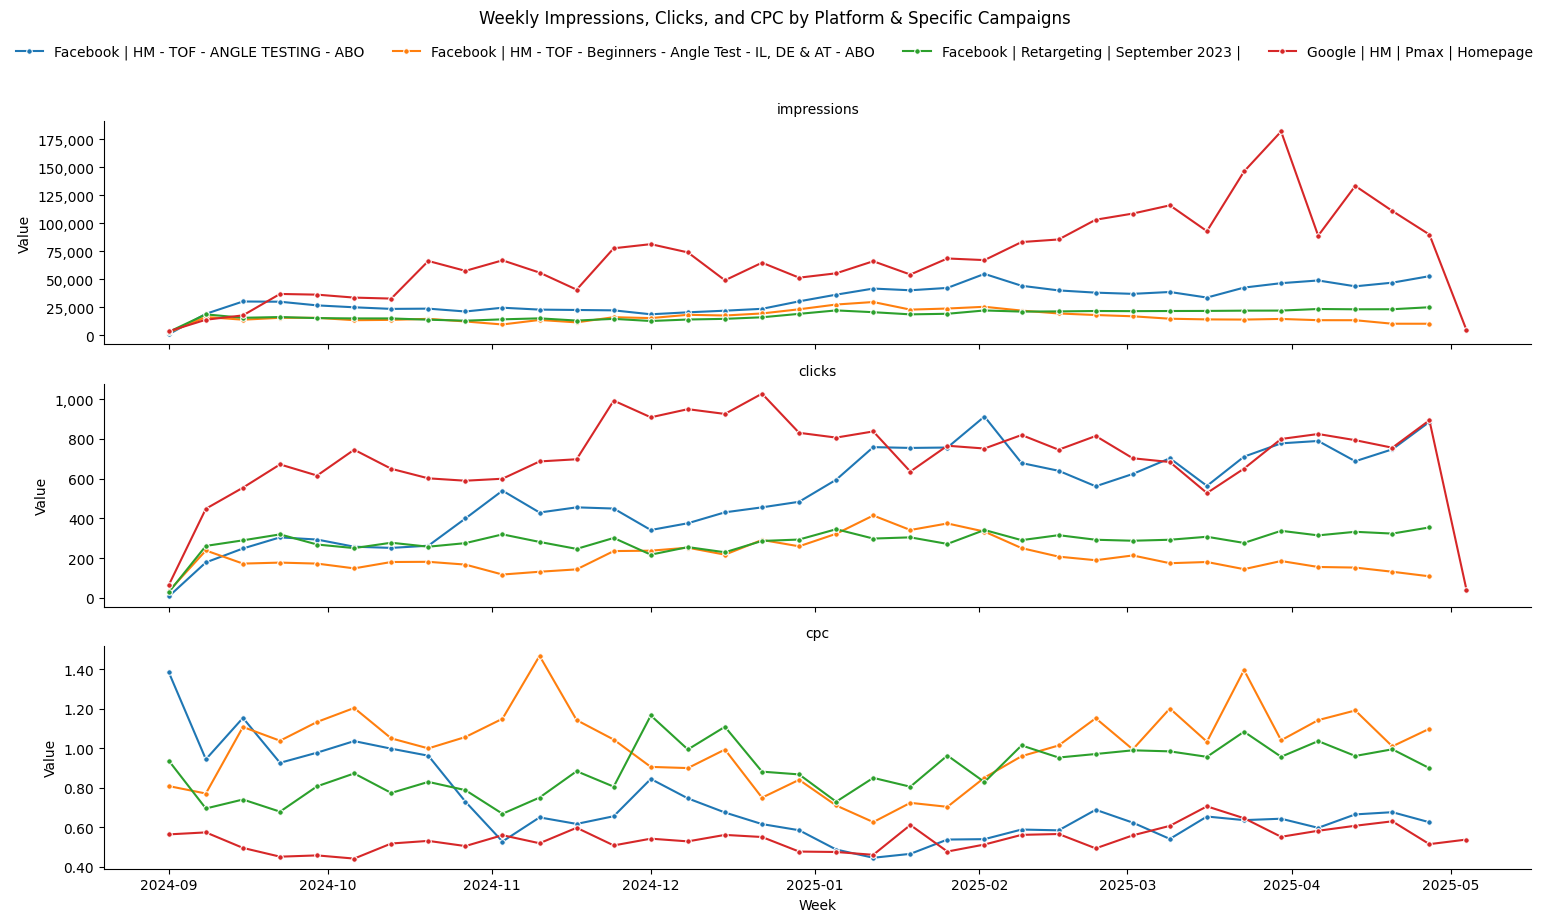

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Assuming 'ads_data' is your DataFrame

# --- Refined Preparation ---
# Make a copy
ads_data_prepared = ads_data.copy()

# Ensure 'date', 'platform', 'campaign' are columns
if isinstance(ads_data_prepared.index, pd.MultiIndex):
    index_names = ads_data_prepared.index.names
    if "date" in index_names or "platform" in index_names or "campaign" in index_names:
        ads_data_prepared = ads_data_prepared.reset_index()
elif ads_data_prepared.index.name in ["date", "platform", "campaign"]:
    ads_data_prepared = ads_data_prepared.reset_index()

# Check required columns exist
required_cols = ["date", "platform", "campaign", "impressions", "clicks", "cpc"]
missing_cols = [col for col in required_cols if col not in ads_data_prepared.columns]
if missing_cols:
    raise ValueError(
        f"DataFrame is missing required columns: {missing_cols}. Found columns: {ads_data_prepared.columns.tolist()}"
    )

# Ensure 'date' column is datetime
try:
    ads_data_prepared["date"] = pd.to_datetime(ads_data_prepared["date"])
except Exception as e:
    raise ValueError(f"Could not convert 'date' column to datetime: {e}")

# Define aggregation rules for resampling
resampling_agg = {"impressions": "sum", "clicks": "sum", "cpc": "mean"}

# --- Visualization 3: Weekly Metrics by Platform (Corrected Grouping) ---
print("Generating Visualization 3: Weekly Impressions, Clicks, CPC by Platform...")

# Group by platform and weekly date Grouper, then aggregate
# This approach often handles index naming more predictably
platform_weekly = ads_data_prepared.groupby(
    ["platform", pd.Grouper(key="date", freq="W")]
)[["impressions", "clicks", "cpc"]].agg(resampling_agg)

# Reset index - this should now reliably produce 'platform' and 'date' columns
platform_weekly_plot = platform_weekly.reset_index()

# Check columns before melting (for debugging, optional)
# print("Vis 3 Columns:", platform_weekly_plot.columns)

# Create the line charts using Seaborn's FacetGrid for clarity
g1 = sns.FacetGrid(
    platform_weekly_plot.melt(
        id_vars=["date", "platform"], var_name="metric", value_name="value"
    ),
    col="metric",  # Separate plots for each metric
    hue="platform",  # Different line color for each platform
    col_wrap=1,  # Stack plots vertically
    height=3,
    aspect=3,
    sharey=False,  # Allow different y-axis scales
)
g1.map(sns.lineplot, "date", "value", marker="o", markersize=4)
g1.fig.suptitle("Weekly Impressions, Clicks, and CPC by Platform", y=1.02)
g1.set_axis_labels("Week", "Value")
g1.set_titles(col_template="{col_name}")
g1.add_legend(
    title="Platform",
)
sns.move_legend(
    g1,
    "lower center",
    bbox_to_anchor=(0.5, 0.95),
    ncol=2,
    title=None,
    frameon=False,
)

# Format y-axis
for ax in g1.axes.flat:
    if ax.get_title() in ["impressions", "clicks"]:
        ax.yaxis.set_major_formatter(
            mticker.FuncFormatter(lambda x, p: format(int(x), ","))
        )
    elif ax.get_title() == "cpc":
        ax.yaxis.set_major_formatter(mticker.FormatStrFormatter("%.2f"))

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# --- Visualization 4: Weekly Metrics by Platform & Specific Campaigns (Corrected Grouping) ---
print("\nGenerating Visualization 4: Weekly Metrics for Specific Campaigns...")

# Filter for specific campaigns (using the prepared dataframe)
campaign_filter = [
    "HM - TOF - ANGLE TESTING - ABO",
    "HM - TOF - Beginners - Angle Test - IL, DE & AT - ABO",
    "Retargeting | September 2023 |",
    "HM | Pmax | Homepage",
]
ads_data_filtered = ads_data_prepared[
    ads_data_prepared["campaign"].isin(campaign_filter)
]

if ads_data_filtered.empty:
    print(
        "Warning: No data found for the specified campaigns. Skipping Visualization 4."
    )
else:
    # Group by platform, campaign, and weekly date Grouper, then aggregate
    platform_campaign_weekly = ads_data_filtered.groupby(
        ["platform", "campaign", pd.Grouper(key="date", freq="W")]
    )[["impressions", "clicks", "cpc"]].agg(resampling_agg)

    # Reset index
    platform_campaign_weekly_plot = platform_campaign_weekly.reset_index()

    # Check columns before melting (for debugging, optional)
    # print("Vis 4 Columns:", platform_campaign_weekly_plot.columns)

    # Combine platform and campaign for hue distinction
    platform_campaign_weekly_plot["platform_campaign"] = (
        platform_campaign_weekly_plot["platform"]
        + " | "
        + platform_campaign_weekly_plot["campaign"]
    )

    # Create the line charts using Seaborn's FacetGrid
    g2 = sns.FacetGrid(
        platform_campaign_weekly_plot.melt(
            id_vars=["date", "platform", "campaign", "platform_campaign"],
            var_name="metric",
            value_name="value",
        ),
        col="metric",
        hue="platform_campaign",
        col_wrap=1,
        height=3,
        aspect=3.5,
        sharey=False,
    )
    g2.map(sns.lineplot, "date", "value", marker="o", markersize=4)
    g2.fig.suptitle(
        "Weekly Impressions, Clicks, and CPC by Platform & Specific Campaigns", y=1.02
    )
    g2.set_axis_labels("Week", "Value")
    g2.set_titles(col_template="{col_name}")
    g2.add_legend(title="Platform | Campaign")
    sns.move_legend(
        g2,
        "lower center",
        bbox_to_anchor=(0.5, 0.95),
        ncol=4,
        title=None,
        frameon=False,
    )
    for ax in g2.axes.flat:
        if ax.get_title() in ["impressions", "clicks"]:
            ax.yaxis.set_major_formatter(
                mticker.FuncFormatter(lambda x, p: format(int(x), ","))
            )
        elif ax.get_title() == "cpc":
            ax.yaxis.set_major_formatter(mticker.FormatStrFormatter("%.2f"))

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


In [11]:
from data_sources.hubspot_conversions import get_first_calls

first_calls = get_first_calls()
first_calls.head()


id  \
date                                            
2024-04-22 20:18:14.414000+00:00  27070610886   
2024-04-22 20:45:31.080000+00:00  27072654834   
2024-04-23 09:17:27.599000+00:00  27091118812   
2024-04-23 13:24:39.820000+00:00  27101483452   
2024-04-24 08:55:08.235000+00:00  27131671776   

                                                        updatedAt  archived  \
date                                                                          
2024-04-22 20:18:14.414000+00:00 2025-03-06 10:23:20.307000+00:00     False   
2024-04-22 20:45:31.080000+00:00 2025-03-06 10:23:20.307000+00:00     False   
2024-04-23 09:17:27.599000+00:00 2025-03-06 10:23:20.307000+00:00     False   
2024-04-23 13:24:39.820000+00:00 2025-03-06 10:23:20.308000+00:00     False   
2024-04-24 08:55:08.235000+00:00 2025-03-06 10:23:20.308000+00:00     False   

                                                                       associations  \
date                                                                                  
2024-04-22 20:18:14.414000+00:00  {'contacts': [{'toObjectId': 9133471951, 'asso...   
2024-04-22 20:45:31.080000+00:00  {'contacts': [{'toObjectId': 9169088709, 'asso...   
2024-04-23 09:17:27.599000+00:00  {'contacts': [{'toObjectId': 9236133328, 'asso...   
2024-04-23 13:24:39.820000+00:00  {'contacts': [{'toObjectId': 9284745672, 'asso...   
2024-04-24 08:55:08.235000+00:00  {'contacts': [{'toObjectId': 9413510904, 'asso...   

                                 activity_type  \
date                                             
2024-04-22 20:18:14.414000+00:00    First Call   
2024-04-22 20:45:31.080000+00:00    First Call   
2024-04-23 09:17:27.599000+00:00    First Call   
2024-04-23 13:24:39.820000+00:00    First Call   
2024-04-24 08:55:08.235000+00:00    First Call   

                                                    hs_createdate  \
date                                                                
2024-04-22 20:18:14.414000+00:00 2024-04-22 20:18:14.414000+00:00   
2024-04-22 20:45:31.080000+00:00 2024-04-22 20:45:31.080000+00:00   
2024-04-23 09:17:27.599000+00:00 2024-04-23 09:17:27.599000+00:00   
2024-04-23 13:24:39.820000+00:00 2024-04-23 13:24:39.820000+00:00   
2024-04-24 08:55:08.235000+00:00 2024-04-24 08:55:08.235000+00:00   

                                 hs_guest_emails  \
date                                               
2024-04-22 20:18:14.414000+00:00            None   
2024-04-22 20:45:31.080000+00:00            None   
2024-04-23 09:17:27.599000+00:00            None   
2024-04-23 13:24:39.820000+00:00            None   
2024-04-24 08:55:08.235000+00:00            None   

                                              hs_lastmodifieddate  \
date                                                                
2024-04-22 20:18:14.414000+00:00 2025-03-06 10:23:20.307000+00:00   
2024-04-22 20:45:31.080000+00:00 2025-03-06 10:23:20.307000+00:00   
2024-04-23 09:17:27.599000+00:00 2025-03-06 10:23:20.307000+00:00   
2024-04-23 13:24:39.820000+00:00 2025-03-06 10:23:20.308000+00:00   
2024-04-24 08:55:08.235000+00:00 2025-03-06 10:23:20.308000+00:00   

                                 hs_meeting_outcome     hs_meeting_start_time  \
date                                                                            
2024-04-22 20:18:14.414000+00:00          SCHEDULED 2024-04-23 10:30:00+00:00   
2024-04-22 20:45:31.080000+00:00          SCHEDULED 2024-04-25 09:00:00+00:00   
2024-04-23 09:17:27.599000+00:00          SCHEDULED 2024-04-29 10:00:00+00:00   
2024-04-23 13:24:39.820000+00:00          SCHEDULED 2024-04-24 09:00:00+00:00   
2024-04-24 08:55:08.235000+00:00          SCHEDULED 2024-04-26 09:30:00+00:00   

                                                    meeting_title  \
date                                                                
2024-04-22 20:18:14.414000+00:00  Calendly: First call with LALIA   
2024-04-22 20:45:31.080000+00:00  Calendly: First call with LALIA   
2024-04

In [3]:
from datetime import datetime, timedelta

facebook_ads_hourly = get_facebook_ads_campaign_metrics(
    time_increment="hourly", since="2025-03-28", until="2025-04-27"
)
facebook_ads_hourly.head()

[2025-04-28 14:48:41 - INFO] Retrieving Facebook Ads campaign metrics
/home/anton/.local/share/virtualenvs/analytics_dashboard-R0UBeZms/lib/python3.12/site-packages/facebook_business/utils/api_utils.py:16: UserWarning: value of breakdowns might not be compatible.  Expect list<breakdowns_enum>;  got <class 'str'>
  warnings.warn(message)
[2025-04-28 14:49:54 - INFO] Retrieved Facebook Ads campaign metrics in 72.53 seconds


campaign  spend  \
date                                                                   
2025-03-28  HM - TOF - Beginners - Angle Test - IL, DE & A...   1.22   
2025-03-28                     HM - TOF - ANGLE TESTING - ABO   2.17   
2025-03-28                     HM - TOF - ANGLE TESTING - ABO   2.69   
2025-03-28                     HM - TOF - ANGLE TESTING - ABO   2.71   
2025-03-28                     HM - TOF - ANGLE TESTING - ABO   3.61   

            impressions  clicks  \
date                              
2025-03-28           95       1   
2025-03-28          232       5   
2025-03-28          202       6   
2025-03-28          250       5   
2025-03-28          233       3   

            hourly_stats_aggregated_by_advertiser_time_zone  
date                                                         
2025-03-28                                              NaN  
2025-03-28                                              NaN  
2025-03-28                                              NaN  
2025-03-28                                              NaN  
2025-03-28                                              NaN

In [6]:
from api_clients import facebook_api

facebook_api.get_campaigns(fields=["name"])

[<Campaign> {
    "id": "120211657450830005",
    "name": "HM - TOF - On-Platform Manual"
}, <Campaign> {
    "id": "120210464007670005",
    "name": "HM - TOF - Higher Level - ABO"
}, <Campaign> {
    "id": "120206072230620005",
    "name": "HM - Tailored Leads - DE & AT - DC Campaign"
}, <Campaign> {
    "id": "120204116003770005",
    "name": "HM - TOF - 2024 NY Sale - CBO"
}, <Campaign> {
    "id": "120203335823560005",
    "name": "HM - TOF - Beginners - Angle Test - IL, DE & AT - ABO"
}, <Campaign> {
    "id": "120201315501870005",
    "name": "HM - TOF/E - CBO"
}, <Campaign> {
    "id": "23862282048880004",
    "name": "M/BOF - RETARGETING - CBO"
}, <Campaign> {
    "id": "23862280589160004",
    "name": "HM - TOF - ANGLE TESTING - ABO"
}, <Campaign> {
    "id": "23858596715120004",
    "name": "LOFT | 05/09/2023 - Austria & Germany"
}, <Campaign> {
    "id": "23858325589770004",
    "name": "Retargeting | September 2023 |"
}, <Campaign> {
    "id": "23858295173870004",
    "nam